In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('lolDF.csv')
df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [149]:
df_blue = pd.DataFrame()
df_red = pd.DataFrame()

for column in df: #Devides the data set to Blue and Red columns
    if 'blue' in column:
        df_blue = pd.concat([df_blue, df[column]], axis=1)
    elif 'red' in column:
        df_red = pd.concat([df_red, df[column]], axis=1)
df_blue = df_blue.drop(labels='blueWins', axis=1)

df_comp = df_blue.copy().add_prefix('comp_') #Creates comparison DF and sets names of columns


for col in range(len(df_blue.columns)):#compares between blue and red DF and creates DF of boolean if blue is higher
    for line in range(len(df_blue)):    # 1 is higher 0 equal -1 is lower
        if (df_blue.iat[line,col])>(df_red.iat[line,col]):
            df_comp.iat[line,col] =  df_blue.iat[line,col]
        elif (df_blue.iat[line,col])==(df_red.iat[line,col]):
            df_comp.iat[line,col] =  0
        else:
            df_comp.iat[line,col] =  -df_red.iat[line,col]
print(df_comp)

      comp_blueWardsPlaced  comp_blueWardsDestroyed  comp_blueFirstBlood  \
0                       28                       -6                    1   
1                        0                        0                   -1   
2                        0                       -3                   -1   
3                       43                       -2                   -1   
4                       75                        4                   -1   
...                    ...                      ...                  ...   
9874                   -46                       -3                    1   
9875                    54                      -21                   -1   
9876                    23                        1                   -1   
9877                   -66                        0                    1   
9878                    18                       -2                    1   

      comp_blueKills  comp_blueDeaths  comp_blueAssists  \
0                  9        

<AxesSubplot:>

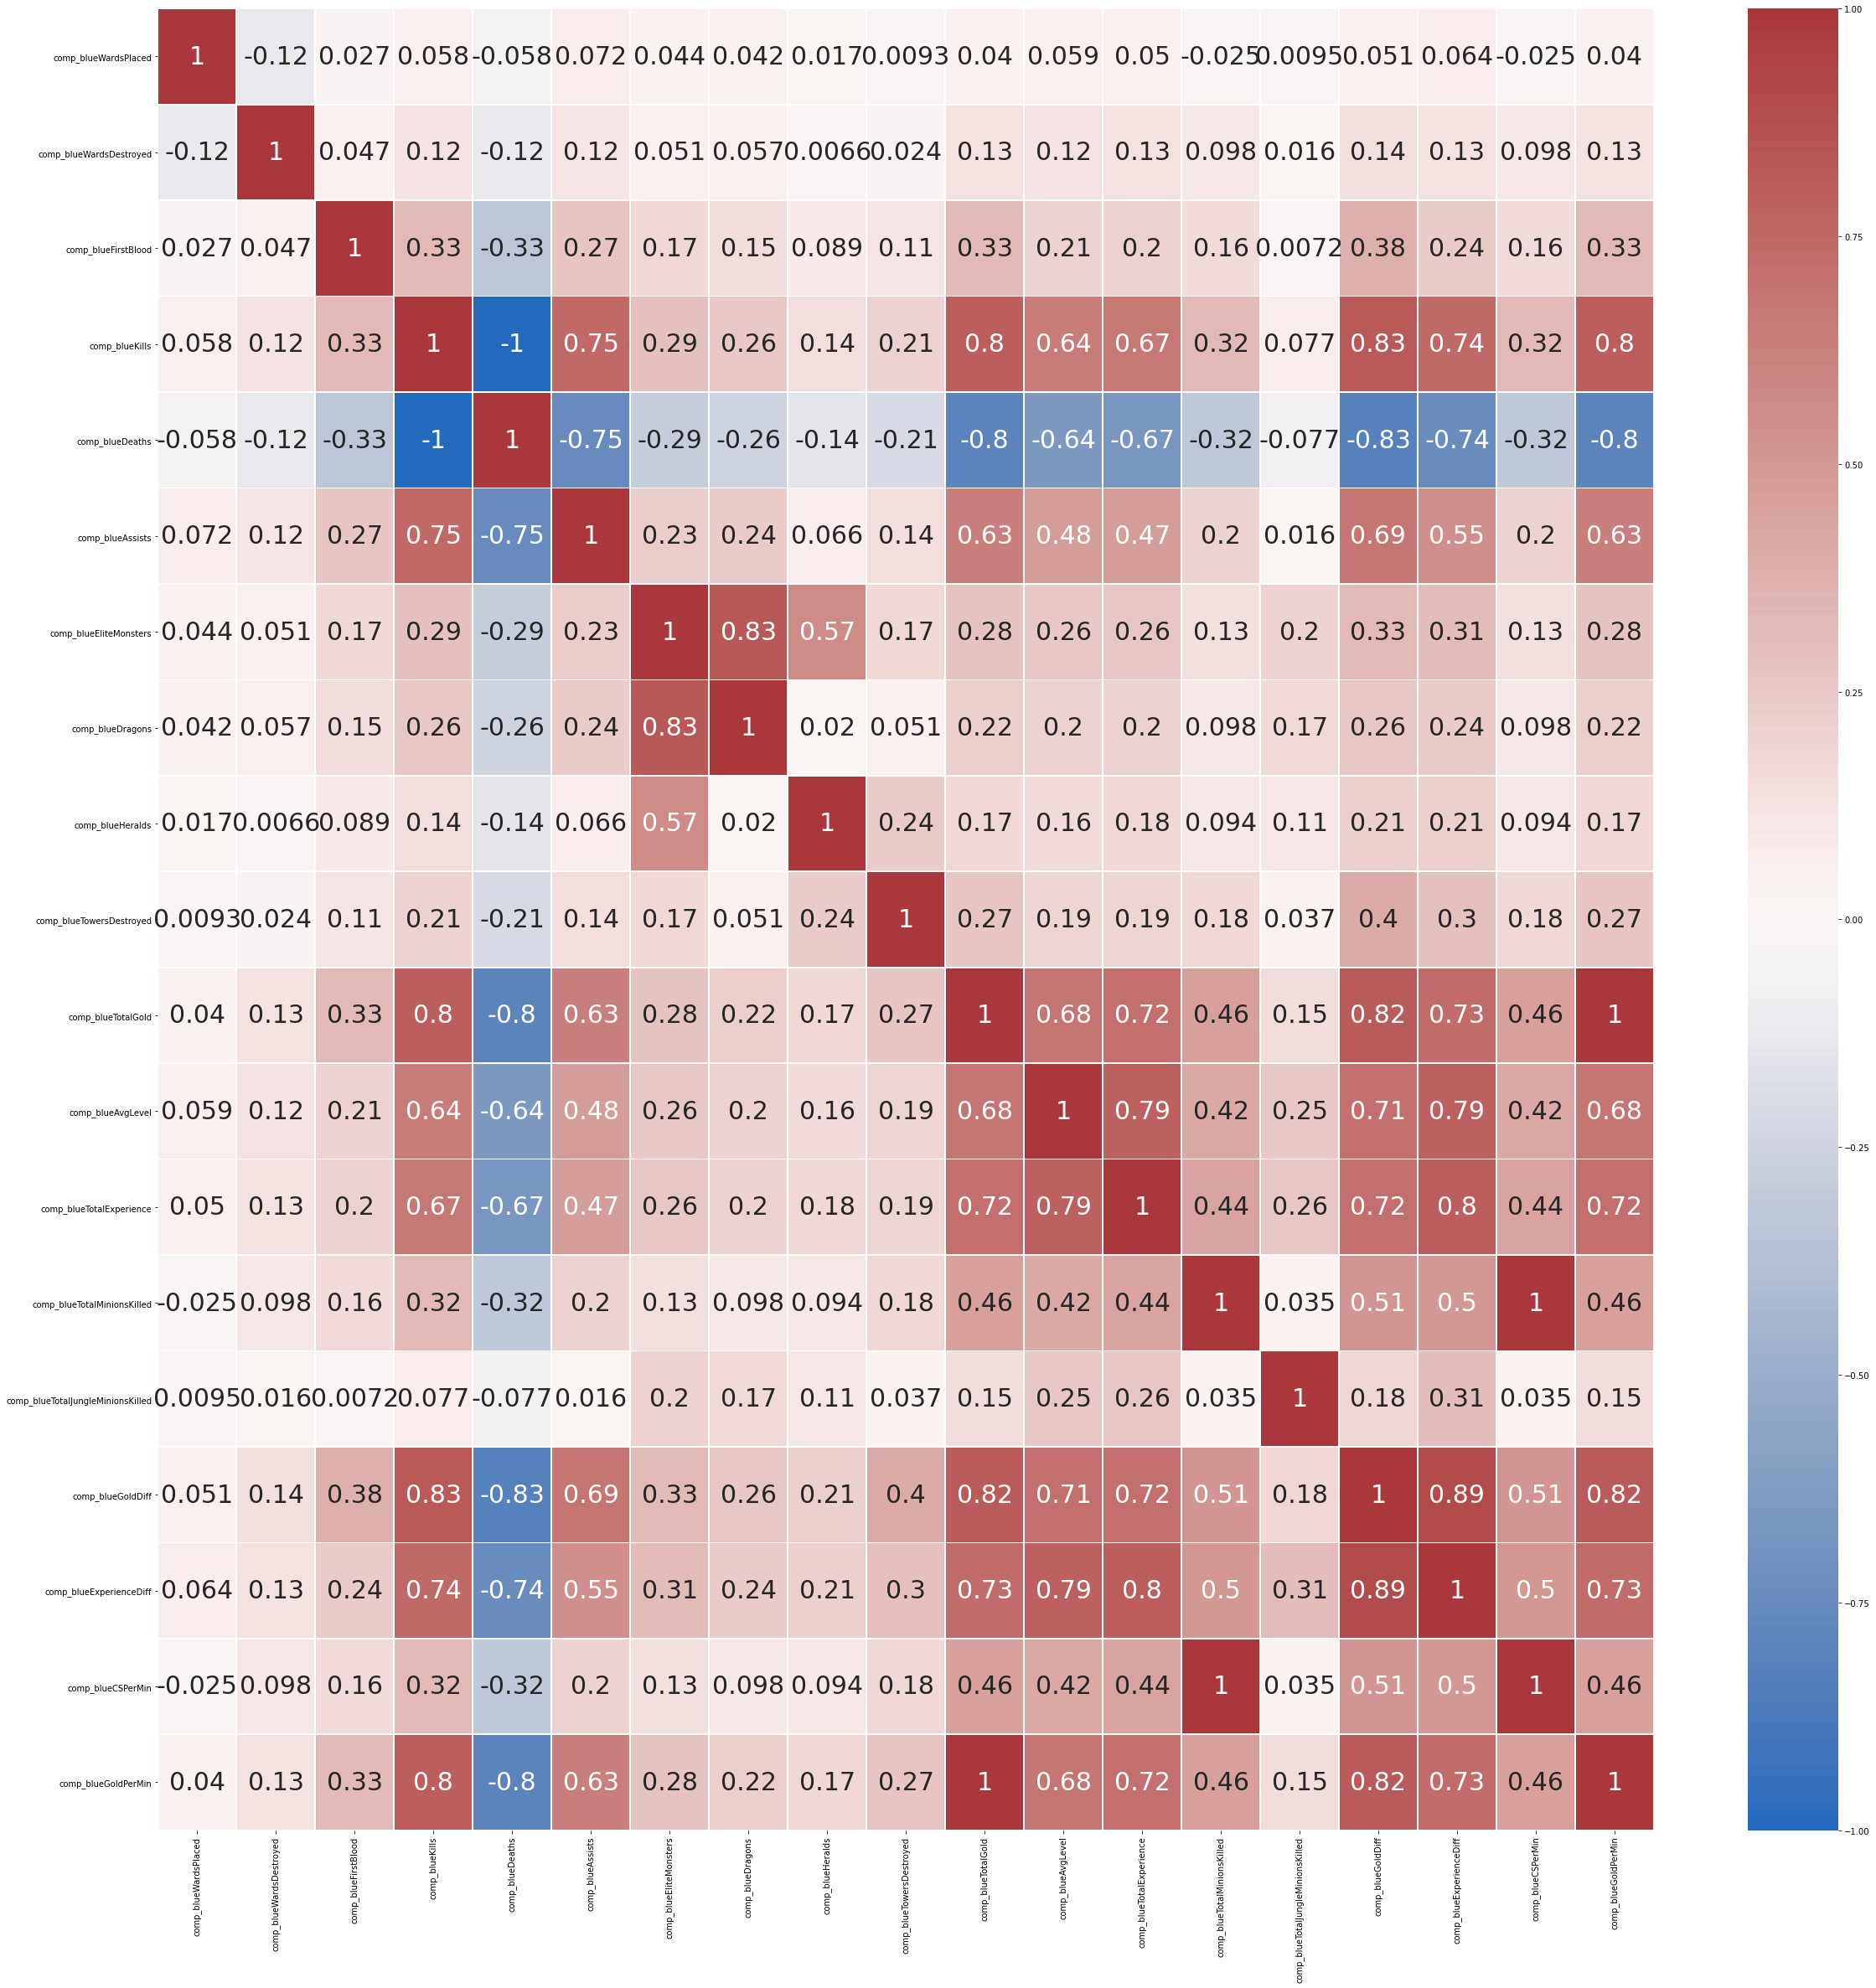

In [150]:
plt.figure(figsize=(40,40))
sns.heatmap(df_comp.corr(),annot = True,linewidths=0.7,annot_kws={"size": 30},cmap='vlag')

In [152]:
#Model Game Id column does not have any effect on our results and blueWins would be the data to predict
X = df_comp
y = df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=41)

lm_model = LinearRegression(normalize = True) #Instantiate

lm_model.fit(X_train, y_train) #Fit Training

y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train) #Predict and score the models

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print(test_score,train_score)

0.27568963645684663 0.28872847255531564
